# Load Data

In [1]:
!gdown https://drive.google.com/uc?id=1biXKxPjRXOrDKnmcKjq_eEU2ogOdcAyd
!gdown https://drive.google.com/uc?id=1C3t8sLPVPUJlX4sLvnL39aKuocFRdrlK
!gdown https://drive.google.com/uc?id=1P0bApuULAsYypXRAvUdMASfHA62adAQ6

Downloading...
From: https://drive.google.com/uc?id=1biXKxPjRXOrDKnmcKjq_eEU2ogOdcAyd
To: /content/diabetes_val.csv
100% 3.39k/3.39k [00:00<00:00, 10.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C3t8sLPVPUJlX4sLvnL39aKuocFRdrlK
To: /content/diabetes_train.csv
100% 20.3k/20.3k [00:00<00:00, 8.17MB/s]
Downloading...
From: https://drive.google.com/uc?id=1P0bApuULAsYypXRAvUdMASfHA62adAQ6
To: /content/diabetes_test.csv
100% 2.35k/2.35k [00:00<00:00, 7.64MB/s]


In [2]:
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data from csv
diabetes_train=np.loadtxt(open("diabetes_train.csv","r"),dtype=str,delimiter=",")
diabetes_val=np.loadtxt(open("diabetes_val.csv","r"),dtype=str,delimiter=",")
diabetes_test=np.loadtxt(open("diabetes_test.csv","r"),dtype=str,delimiter=",")
# Delete first row
diabetes_test=np.delete(diabetes_test,0,axis=0)
diabetes_test=diabetes_test.astype(np.float)
diabetes_train=np.delete(diabetes_train,0,axis=0)
diabetes_train=diabetes_train.astype(np.float)
diabetes_val=np.delete(diabetes_val,0,axis=0)
diabetes_val=diabetes_val.astype(np.float)
# Extract x and y
x_diabetes_test=diabetes_test[:,np.arange(0,8)]
y_diabetes_test=diabetes_test[:,[8]]
y_diabetes_test=np.squeeze(y_diabetes_test)

x_diabetes_train=diabetes_train[:,np.arange(0,8)]
y_diabetes_train=diabetes_train[:,[8]]
y_diabetes_train=np.squeeze(y_diabetes_train)

x_diabetes_val=diabetes_val[:,np.arange(0,8)]
y_diabetes_val=diabetes_val[:,[8]]
y_diabetes_val=np.squeeze(y_diabetes_val)

# Logistic

Text(0.5, 1.0, 'logistic function')

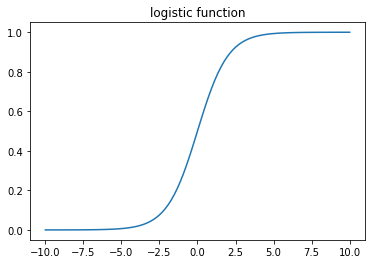

In [4]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function
z = np.linspace(-10,10,100)
plt.plot(z, logistic(z))
plt.title('logistic function')

#Cost Function and Gradient

In [5]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad    


# Regular Logistic Regression

Implementation

In [6]:
class LogisticRegression:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=100, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon  # to get the tolerance for the norm of gradients
        self.max_iters = max_iters  # maximum number of iteration of gradient descent
        self.verbose = verbose
        self.training_accuracy = []
        self.validation_accuracy = []

    def fit(self, x, y,valid_x,valid_y):
        original=x;
        if x.ndim == 1 :
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        mmt = np.zeros(D)
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1
            predict_train=self.predict(original)
            predict_valid=self.predict(valid_x)

            pred_acc = self.correct_rate(predict_train, y)
            valid_acc = self.correct_rate(predict_valid,valid_y)

            self.training_accuracy.append(pred_acc)
            self.validation_accuracy.append(valid_acc)


        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = logistic(np.dot(x, self.w))
        # https://colab.research.google.com/drive/1vsiX558_Mif6oXZDV9IeL7pUZSd6f0am?usp=sharing
        return yh


    def correct_rate(self,yh, test):
        yh[yh < 0.5] = 0
        yh[yh > 0.5] = 1
        val_accuracy = np.mean(yh == test)
        return val_accuracy



LogisticRegression.gradient = gradient  # initialize the gradient method of the LogisticRegression class with gradient function

Test

terminated after 100000 iterations, with norm of the gradient equal to 0.03430786493707425
the weight found: [ 0.13152847  0.014274   -0.02976018 -0.00115303  0.00150239 -0.00238826
  0.06590202 -0.01156154 -0.34707329]


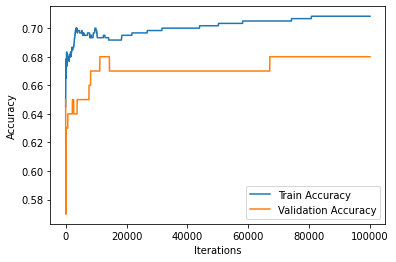

0.6715823


In [7]:

model = LogisticRegression(add_bias=True, learning_rate=0.0001, epsilon=1e-4, max_iters=100000,
                                    verbose=True)
model.fit(x_diabetes_train,y_diabetes_train,x_diabetes_val,y_diabetes_val)
# yh = model.predict(x_diabetes_test)
# val_accuracy = model.correct_rate(yh, y_diabetes_test)
# print(val_accuracy)

avg_train=model.training_accuracy
avg_valid=model.validation_accuracy
# print("Train",avg_train)
# print("Valid",avg_valid)
X = [i for i in range(len(avg_train))]
plt.plot(X, avg_train, label='Train Accuracy')

X2 = [i for i in range(len(avg_valid))]
plt.plot(X2, avg_valid, label='Validation Accuracy')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
print(np.mean(avg_valid))

# Mini-batch Stochastic Gradient Descent

Implementation

In [8]:
class LogisticRegression_MiniBatchStochastic:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False, b_size=8):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.b_size = b_size
        self.training_accuracy = []
        self.validation_accuracy = []
        
    def fit(self, x, y,valid_x,valid_y):
        original=x;
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            data = np.column_stack([x, y])
            np.random.shuffle(data)
            x = data[:,:-1]
            y = data[:,-1]
            y = np.squeeze(y)
            for i in range(0, N, self.b_size):
                g = self.gradient(x[i : min(i + self.b_size, N), :], y[i : min(i + self.b_size, N)])
                
                self.w = self.w - self.learning_rate * g 
                if np.linalg.norm(g) <= self.epsilon or t >= self.max_iters:
                    break
            t += 1
            predict_train=self.predict(original)
            predict_valid=self.predict(valid_x)

            pred_acc = self.correct_rate(predict_train, y)
            valid_acc = self.correct_rate(predict_valid,valid_y)

            self.training_accuracy.append(pred_acc)
            self.validation_accuracy.append(valid_acc)
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))
        return yh
    def correct_rate(self,yh, test):
        yh[yh < 0.5] = 0
        yh[yh > 0.5] = 1
        val_accuracy = np.mean(yh == test)
        return val_accuracy

LogisticRegression_MiniBatchStochastic.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

Test

b_size=16

terminated after 100000 iterations, with norm of the gradient equal to 40.966504469012015
the weight found: [ 1.38539200e-01  3.33858908e-02 -1.40817664e-02 -2.37916877e-03
  5.45101364e-03  6.31924476e-02  6.89549977e-01  6.60370247e-03
 -6.30729301e+00]


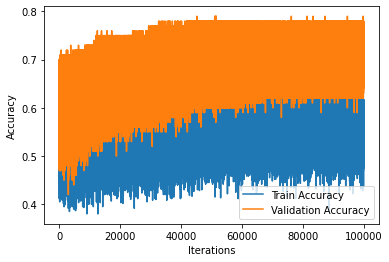

0.7119540999999999


In [ ]:
model = LogisticRegression_MiniBatchStochastic(add_bias=True, learning_rate=0.0001, epsilon=1e-4, max_iters=100000,
                                    verbose=True, b_size=16)
model.fit(x_diabetes_train, y_diabetes_train,x_diabetes_val,y_diabetes_val)
# yh = model.predict(x_diabetes_test)
# val_accuracy = model.correct_rate(yh, y_diabetes_test)
# print(val_accuracy)

avg_train=model.training_accuracy
avg_valid=model.validation_accuracy
# print("Train",avg_train)
# print("Valid",avg_valid)
X = [i for i in range(len(avg_train))]
plt.plot(X, avg_train, label='Train Accuracy')

X2 = [i for i in range(len(avg_valid))]
plt.plot(X2, avg_valid, label='Validation Accuracy')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
print(np.mean(avg_valid))

In [ ]:
b_size=10

terminated after 100000 iterations, with norm of the gradient equal to 16.17692123535678
the weight found: [ 1.46442073e-01  2.98590996e-02 -1.72811374e-02 -3.73338827e-03
  2.70345274e-03  7.60225917e-02  8.07020458e-01  6.99877597e-03
 -7.53290057e+00]


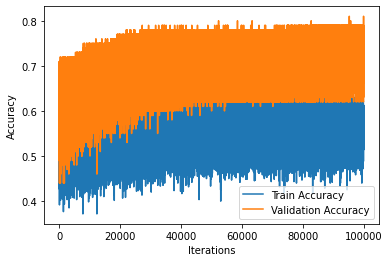

0.7218627999999998


In [ ]:
model = LogisticRegression_MiniBatchStochastic(add_bias=True, learning_rate=0.0001, epsilon=1e-4, max_iters=100000,
                                    verbose=True, b_size=10)
model.fit(x_diabetes_train, y_diabetes_train,x_diabetes_val,y_diabetes_val)
# yh = model.predict(x_diabetes_test)
# val_accuracy = model.correct_rate(yh, y_diabetes_test)
# print(val_accuracy)

avg_train=model.training_accuracy
avg_valid=model.validation_accuracy
# print("Train",avg_train)
# print("Valid",avg_valid)
X = [i for i in range(len(avg_train))]
plt.plot(X, avg_train, label='Train Accuracy')

X2 = [i for i in range(len(avg_valid))]
plt.plot(X2, avg_valid, label='Validation Accuracy')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
print(np.mean(avg_valid))

terminated after 100000 iterations, with norm of the gradient equal to 25.4301206255262
the weight found: [ 1.50381694e-01  3.99311135e-02 -1.15230880e-02 -4.34686958e-03
 -2.17381501e-03  8.44451429e-02  8.61171777e-01  9.37083087e-03
 -8.07677310e+00]


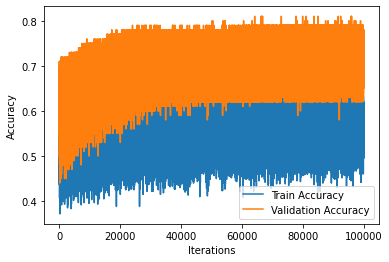

0.7218199


In [ ]:
model = LogisticRegression_MiniBatchStochastic(add_bias=True, learning_rate=0.0001, epsilon=1e-4, max_iters=100000,
                                    verbose=True, b_size=8)
model.fit(x_diabetes_train, y_diabetes_train,x_diabetes_val,y_diabetes_val)
# yh = model.predict(x_diabetes_test)
# val_accuracy = model.correct_rate(yh, y_diabetes_test)
# print(val_accuracy)

avg_train=model.training_accuracy
avg_valid=model.validation_accuracy
# print("Train",avg_train)
# print("Valid",avg_valid)
X = [i for i in range(len(avg_train))]
plt.plot(X, avg_train, label='Train Accuracy')

X2 = [i for i in range(len(avg_valid))]
plt.plot(X2, avg_valid, label='Validation Accuracy')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
print(np.mean(avg_valid))

#Momentum Gradient Descent

Implementation

In [9]:
class LogisticRegression_Momentum:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False, momentum_coef=0):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.momentum_coef = momentum_coef
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        mmt = np.zeros(D)
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            mmt = self.momentum_coef * mmt + (1-self.momentum_coef) * g
            self.w = self.w - self.learning_rate * mmt 
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))
#https://colab.research.google.com/drive/1vsiX558_Mif6oXZDV9IeL7pUZSd6f0am?usp=sharing
        return yh

LogisticRegression_Momentum.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

Test


In [ ]:
model=LogisticRegression_Momentum(add_bias=True, learning_rate=0.0001, epsilon=1e-4, max_iters=100000, verbose=True, momentum_coef=0.6)
model.fit(x_diabetes_train,y_diabetes_train)
yh=model.predict(x_diabetes_test)
yh[yh<0.5]=0
yh[yh>0.5]=1
val_accuracy=np.mean(yh==y_diabetes_test)
print(val_accuracy)

terminated after 6522337 iterations, with norm of the gradient equal to 9.999999758550451e-05
the weight found: [ 1.45318179e-01  3.64855094e-02 -1.19370907e-02 -3.64756733e-03
 -4.91482432e-04  8.97509318e-02  8.82358816e-01  1.07236539e-02
 -8.52976872e+00]
0.75


Different values of momentum

terminated after 6522337 iterations, with norm of the gradient equal to 9.999999758550451e-05
the weight found: [ 1.45318179e-01  3.64855094e-02 -1.19370907e-02 -3.64756733e-03
 -4.91482432e-04  8.97509318e-02  8.82358816e-01  1.07236539e-02
 -8.52976872e+00]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



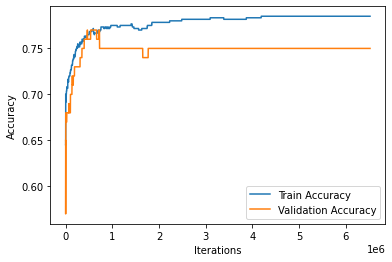

0.7484657186526856


In [ ]:
class LogisticRegression_Momentum:

    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=100, verbose=False, momentum_coef=0):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon  # to get the tolerance for the norm of gradients
        self.max_iters = max_iters  # maximum number of iteration of gradient descent
        self.verbose = verbose
        self.momentum_coef = momentum_coef
        self.training_accuracy = []
        self.validation_accuracy = []

    def fit(self, x, y,valid_x,valid_y):
        original=x;
        if x.ndim == 1 :
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        mmt = np.zeros(D)
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            mmt = self.momentum_coef * mmt + (1 - self.momentum_coef) * g
            self.w = self.w - self.learning_rate * mmt
            t += 1
            predict_train=self.predict(original)
            predict_valid=self.predict(valid_x)

            pred_acc = self.correct_rate(predict_train, y)
            valid_acc = self.correct_rate(predict_valid,valid_y)

            self.training_accuracy.append(pred_acc)
            self.validation_accuracy.append(valid_acc)


        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x, np.ones(Nt)])
        yh = logistic(np.dot(x, self.w))
        # https://colab.research.google.com/drive/1vsiX558_Mif6oXZDV9IeL7pUZSd6f0am?usp=sharing
        return yh


    def correct_rate(self,yh, test):
        yh[yh < 0.5] = 0
        yh[yh > 0.5] = 1
        val_accuracy = np.mean(yh == test)
        return val_accuracy



LogisticRegression_Momentum.gradient = gradient  # initialize the gradient method of the LogisticRegression class with gradient function
model = LogisticRegression_Momentum(add_bias=True, learning_rate=0.0001, epsilon=1e-4, max_iters=100000,
                                    verbose=True, momentum_coef=0.6)
model.fit(x_diabetes_train, y_diabetes_train,x_diabetes_val,y_diabetes_val)
# yh = model.predict(x_diabetes_test)
# val_accuracy = model.correct_rate(yh, y_diabetes_test)
# print(val_accuracy)

avg_train=model.training_accuracy
avg_valid=model.validation_accuracy
print("Train",avg_train)
print("Valid",avg_valid)
X = [i for i in range(len(avg_train))]
plt.plot(X, avg_train, label='Train Accuracy')

X2 = [i for i in range(len(avg_valid))]
plt.plot(X2, avg_valid, label='Validation Accuracy')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
print(np.mean(avg_valid))


terminated after 6522325 iterations, with norm of the gradient equal to 9.999998565351089e-05
the weight found: [ 1.45318179e-01  3.64855095e-02 -1.19370907e-02 -3.64756733e-03
 -4.91482433e-04  8.97509319e-02  8.82358816e-01  1.07236539e-02
 -8.52976872e+00]
Train 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



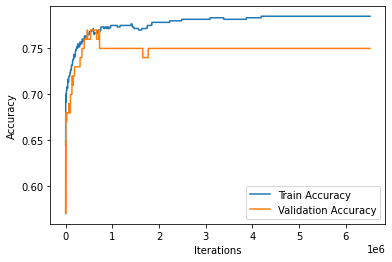

0.7484657311618175


In [ ]:

LogisticRegression_Momentum.gradient = gradient  # initialize the gradient method of the LogisticRegression class with gradient function
model = LogisticRegression_Momentum(add_bias=True, learning_rate=0.0001, epsilon=1e-4, max_iters=100000,
                                    verbose=True, momentum_coef=0.8)
model.fit(x_diabetes_train, y_diabetes_train,x_diabetes_val,y_diabetes_val)
# yh = model.predict(x_diabetes_test)
# val_accuracy = model.correct_rate(yh, y_diabetes_test)
# print(val_accuracy)

avg_train=model.training_accuracy
avg_valid=model.validation_accuracy
print("Train",avg_train)
print("Valid",avg_valid)
X = [i for i in range(len(avg_train))]
plt.plot(X, avg_train, label='Train Accuracy')

X2 = [i for i in range(len(avg_valid))]
plt.plot(X2, avg_valid, label='Validation Accuracy')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
print(np.mean(avg_valid))


# Mini-Batch and Momentum

In [ ]:
class LogisticRegression_MinibatchAndMomentum:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False, b_size=8, momentum_coef=0):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.b_size = b_size
        self.momentum_coef = momentum_coef
        self.training_accuracy = []
        self.validation_accuracy = []
        
    def fit(self, x, y, valid_x, valid_y):
        original = x
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        mmt = np.zeros(D)
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            for i in range(0, N, self.b_size):
                g = self.gradient(x[i : min(i + self.b_size, N), :], y[i : min(i + self.b_size, N)])
                mmt = self.momentum_coef * mmt + (1-self.momentum_coef) * g
                self.w = self.w - self.learning_rate * mmt 
                if np.linalg.norm(g) <= self.epsilon or t >= self.max_iters:
                    break
            t += 1
            predict_train=self.predict(original)
            predict_valid=self.predict(valid_x)

            pred_acc = self.correct_rate(predict_train, y)
            valid_acc = self.correct_rate(predict_valid,valid_y)

            self.training_accuracy.append(pred_acc)
            self.validation_accuracy.append(valid_acc)
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))
        return yh
    
    def correct_rate(self,yh, test):
        yh[yh < 0.5] = 0
        yh[yh > 0.5] = 1
        val_accuracy = np.mean(yh == test)
        return val_accuracy

LogisticRegression_MinibatchAndMomentum.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

terminated after 100000 iterations, with norm of the gradient equal to 6.176597807037752
the weight found: [ 1.23162795e-01  1.66134412e-02 -2.48406808e-02 -1.64784569e-03
  9.82640995e-04  8.43073922e-03  2.37067579e-01 -7.32946164e-03
 -1.57556206e+00]
Train [0.645, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.655, 0.6566666666666666, 0.6566666666666666, 0.6583333333333333, 0.66, 0.6616666666666666, 0.665, 0.6666666666666666, 0.6683333333333333, 0.67, 0.6683333333333333, 0.6683333333333333, 0.67, 0.6683333333333333, 0.6666666666666666, 0.6683333333333333, 0.6683333333333333, 0.6716666666666666, 0.67, 0.67, 0.67, 0.6733333333333333, 0.6716666666666666, 0.67, 0.6683333333333333, 0.67, 0.6716666666666666, 0.6716666666666666, 0.6733333333333333, 0.6716666666666666, 0.6716666666666666, 0.6733333333333333, 0.675, 0.6766666666666666, 0.6783333333333333, 0.6783333333333333, 0.68, 0.68, 0.68, 0.6783333333333333, 0.6783333333333333, 0.6766666666666666, 0.6766666666666666, 0.67

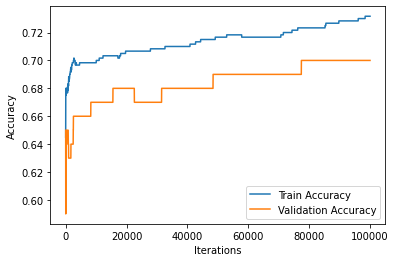

0.6835946999999997


In [ ]:
model=LogisticRegression_MinibatchAndMomentum(add_bias=True, learning_rate=0.0001, epsilon=1e-4, max_iters=100000, verbose=True, b_size=128 ,momentum_coef=0.6)
model.fit(x_diabetes_train,y_diabetes_train, x_diabetes_val, y_diabetes_val)
avg_train=model.training_accuracy
avg_valid=model.validation_accuracy
print("Train",avg_train)
print("Valid",avg_valid)
X = [i for i in range(len(avg_train))]
plt.plot(X, avg_train, label='Train Accuracy')

X2 = [i for i in range(len(avg_valid))]
plt.plot(X2, avg_valid, label='Validation Accuracy')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()
print(np.mean(avg_valid))